In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [115]:
# Uploading dataset
data = pd.read_csv('/content/drive/MyDrive/Exit Exam/Obesity.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [116]:
data.shape

(2111, 17)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [118]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2101.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.488346,1.701995,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,7.365358,0.093288,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,2.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.804818,1.701284,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768834,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,99.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


**Data Cleaning and Preprocessing**

In [119]:
data.isnull().sum()

,0
Gender,9
Age,0
Height,10
Weight,0
family_history_with_overweight,6
FAVC,0
FCVC,0
NCP,0
CAEC,9
SMOKE,0


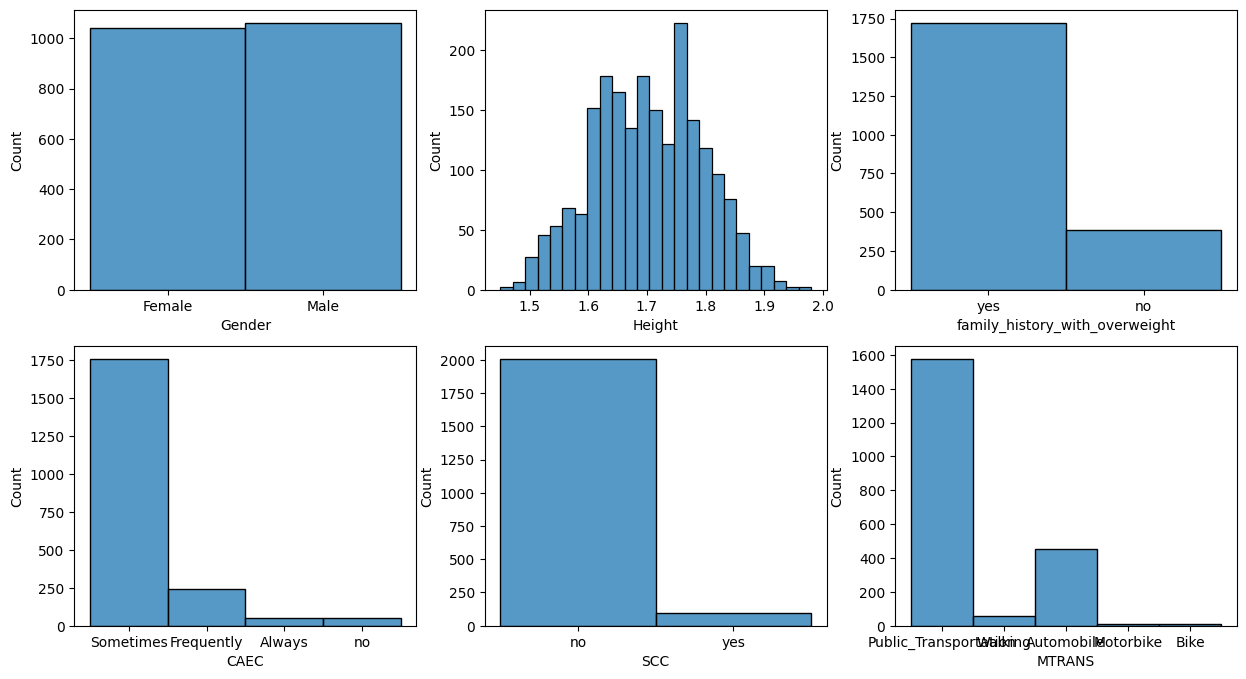

In [120]:
# find distribution of features contain missing values using histplot of 'Gender', 'Height','family_history_with_overweight', 'CAEC', 'SCC', 'MTRANS'
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
sns.histplot(data['Gender'])
plt.subplot(2,3,2)
sns.histplot(data['Height'])
plt.subplot(2,3,3)
sns.histplot(data['family_history_with_overweight'])
plt.subplot(2,3,4)
sns.histplot(data['CAEC'])
plt.subplot(2,3,5)
sns.histplot(data['SCC'])
plt.subplot(2,3,6)
sns.histplot(data['MTRANS'])
plt.show()

In [121]:
# Removing null values
# Gender
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
# Height
data['Height'].fillna(data['Height'].mean(), inplace=True)
# family_history_with_overweight
data['family_history_with_overweight'].fillna(data['family_history_with_overweight'].mode()[0], inplace=True)
# CAEC
data['CAEC'].fillna(data['CAEC'].mode()[0], inplace=True)
# SCC
data['SCC'].fillna(data['SCC'].mode()[0], inplace=True)
# MTRANS
data['MTRANS'].fillna(data['MTRANS'].mode()[0], inplace=True)

In [122]:
data.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


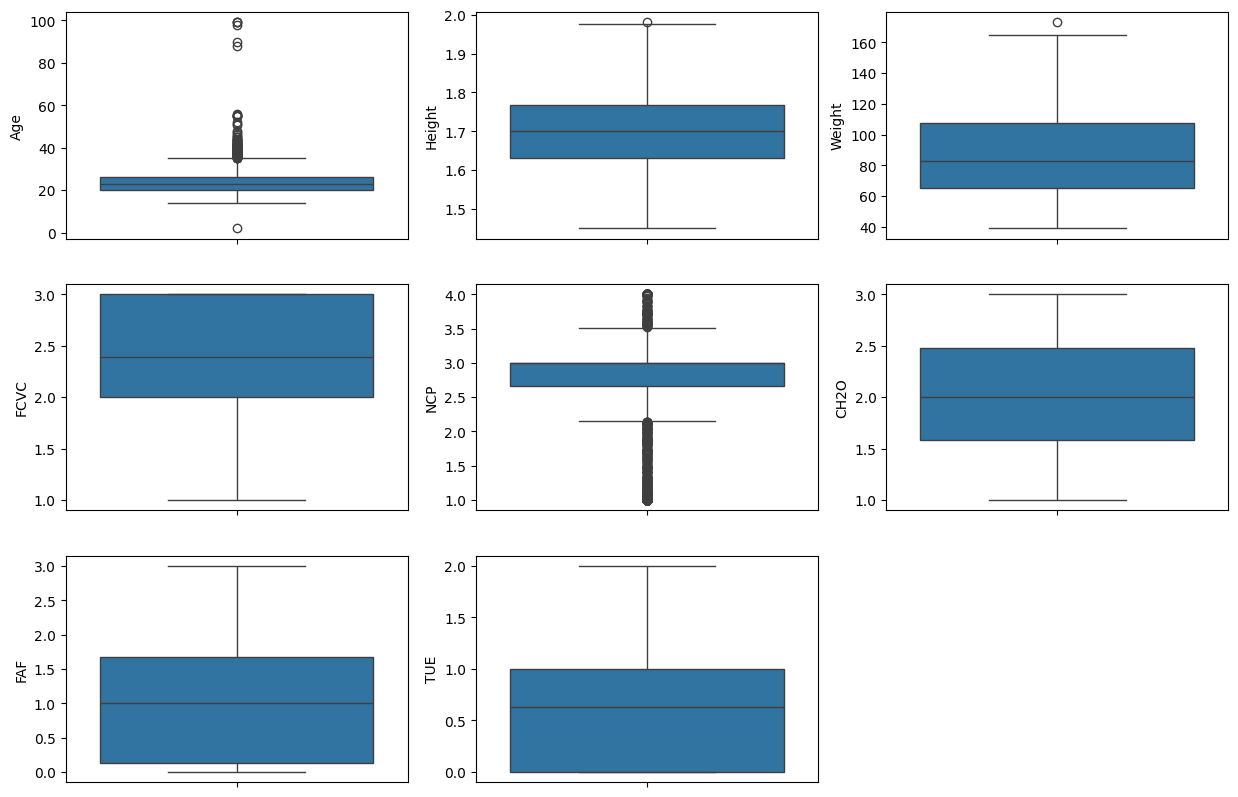

In [123]:
# Checking outliers
outlier_columns = data.select_dtypes(exclude='object').columns

plt.figure(figsize=(15,10))
for i,col in enumerate(outlier_columns):
  plt.subplot(3,3,i+1)
  sns.boxplot(data[col])
plt.show()


In [124]:
# removing outliers
for col in outlier_columns:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1

  min_value = Q1 - (1.5 * IQR)
  max_value = Q3 + (1.5 * IQR)

  data[col] = np.where(data[col] < min_value, min_value, data[col])
  data[col] = np.where(data[col] > max_value, max_value, data[col])

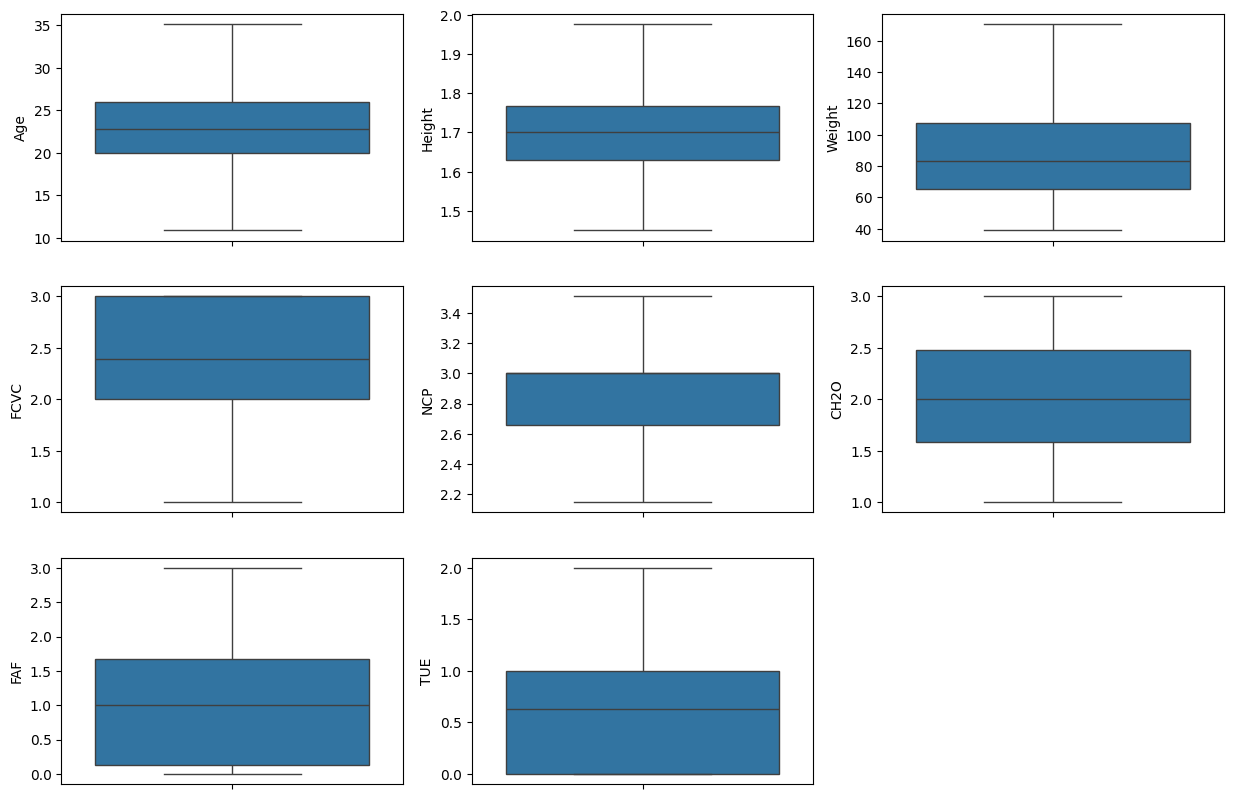

In [125]:
# rechecking outliers
plt.figure(figsize=(15,10))
for i,col in enumerate(outlier_columns):
  plt.subplot(3,3,i+1)
  sns.boxplot(data[col])
plt.show()

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [127]:
# unique values of all categorical columns
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
  print(f'{col}: {data[col].unique()}')


Gender: ['Female' 'Male']
family_history_with_overweight: ['yes' 'no']
FAVC: ['no' 'yes']
CAEC: ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE: ['no' 'yes']
SCC: ['no' 'yes']
CALC: ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


Exploratory Data Analysis (EDA)

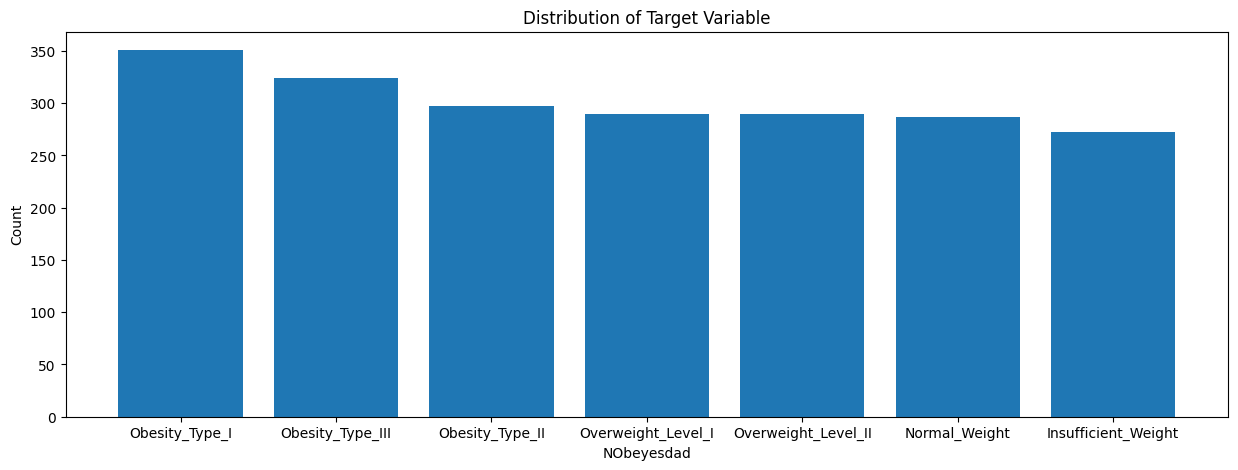

In [128]:
# distribution of target variable
plt.figure(figsize=(15,5))
plt.bar(data['NObeyesdad'].value_counts().index, data['NObeyesdad'].value_counts())
plt.title('Distribution of Target Variable')
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.show()

Encoding and Scaling

In [129]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

In [130]:
cat_cols = data.select_dtypes(include='object').columns
num_cols = data.select_dtypes(exclude='object').columns

le = LabelEncoder()
for col in cat_cols:
  data[col] = le.fit_transform(data[col])
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.000000,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.000000,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.000000,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.000000,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,2.146845,2,0,2.0,0,0.0,0.0,2,3,6


In [131]:

ss = StandardScaler()
data[num_cols] = ss.fit_transform(data[num_cols])
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.552360,-0.881269,-0.862644,1,0,-0.785019,0.410364,2,0,-0.013073,0,-1.188039,0.561997,3,3,1
1,0,-0.552360,-1.956081,-1.168210,1,0,1.088342,0.410364,2,1,1.618759,1,2.339750,-1.080625,2,3,1
2,1,-0.175422,1.053392,-0.366099,1,0,-0.785019,0.410364,2,0,-0.013073,0,1.163820,0.561997,1,3,1
3,1,0.578455,1.053392,0.015858,0,0,1.088342,0.410364,2,0,-0.013073,0,1.163820,-1.080625,1,4,5
4,1,-0.363891,0.838429,0.122807,0,0,-0.785019,-1.718252,2,0,-0.013073,0,-1.188039,-1.080625,2,3,6


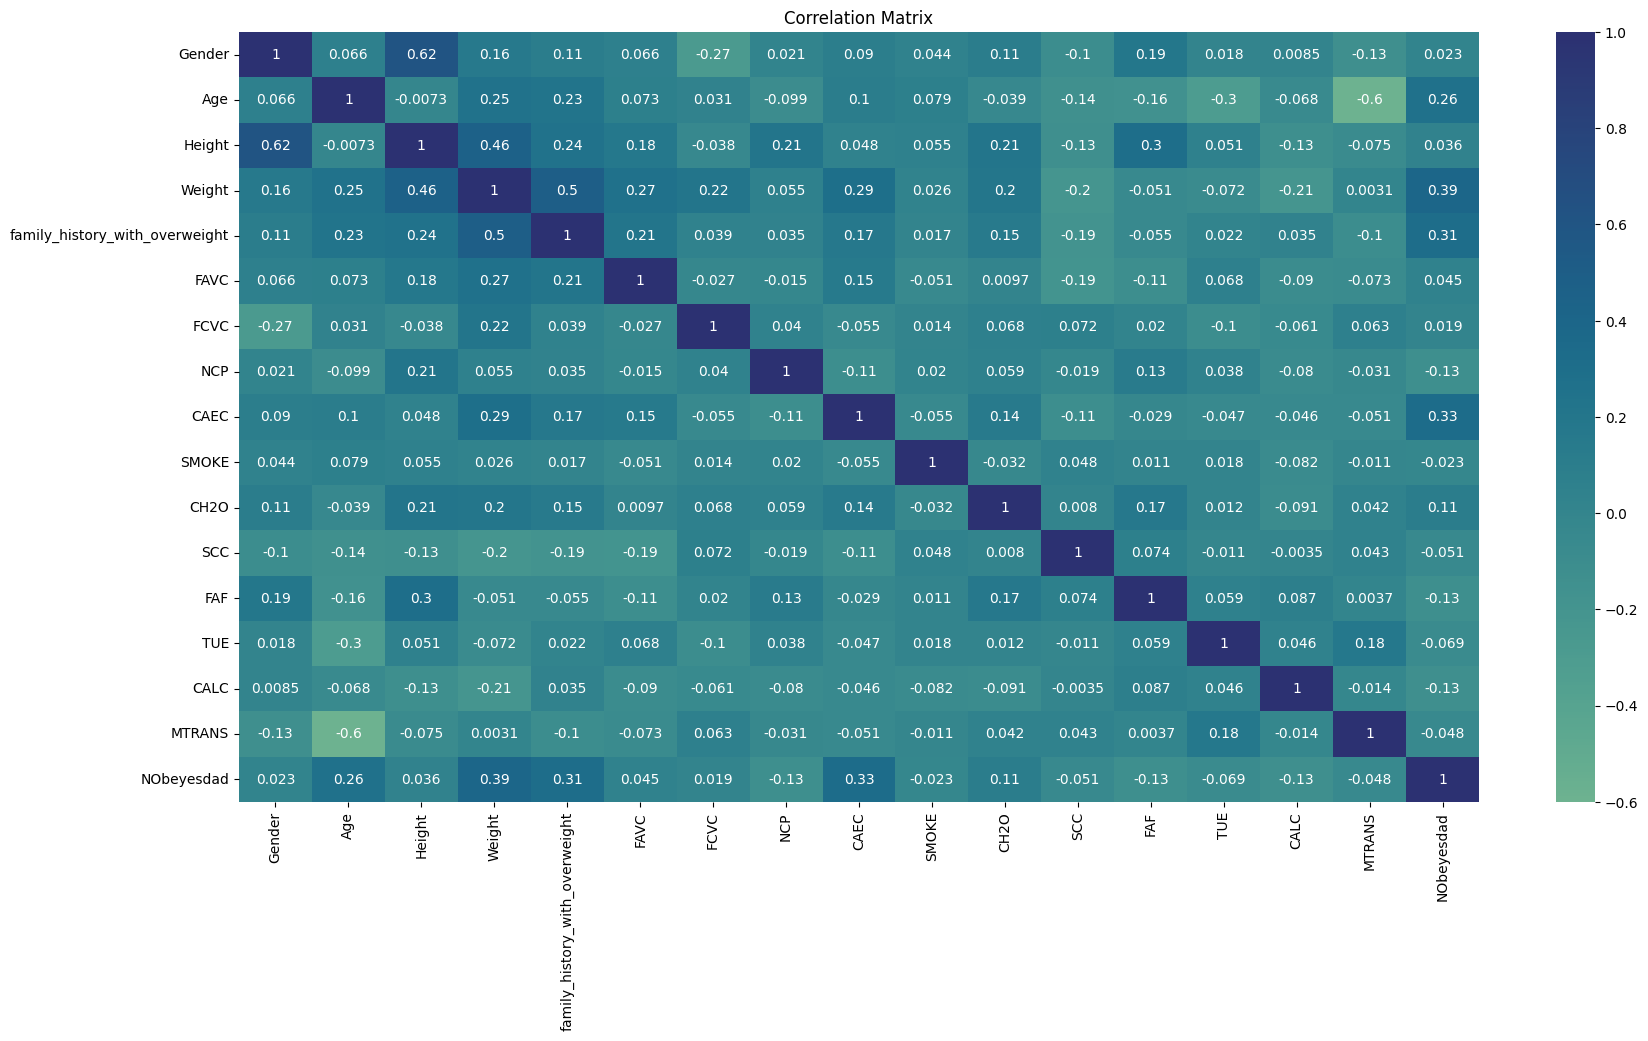

In [134]:
# Correlation
corr_matrix = data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='crest', center=0)
plt.title('Correlation Matrix')
plt.show()

In [135]:
# dropping highly correlated features
data.drop(['MTRANS'], axis=1, inplace=True)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad
0,0,-0.552360,-0.881269,-0.862644,1,0,-0.785019,0.410364,2,0,-0.013073,0,-1.188039,0.561997,3,1
1,0,-0.552360,-1.956081,-1.168210,1,0,1.088342,0.410364,2,1,1.618759,1,2.339750,-1.080625,2,1
2,1,-0.175422,1.053392,-0.366099,1,0,-0.785019,0.410364,2,0,-0.013073,0,1.163820,0.561997,1,1
3,1,0.578455,1.053392,0.015858,0,0,1.088342,0.410364,2,0,-0.013073,0,1.163820,-1.080625,1,5
4,1,-0.363891,0.838429,0.122807,0,0,-0.785019,-1.718252,2,0,-0.013073,0,-1.188039,-1.080625,2,6


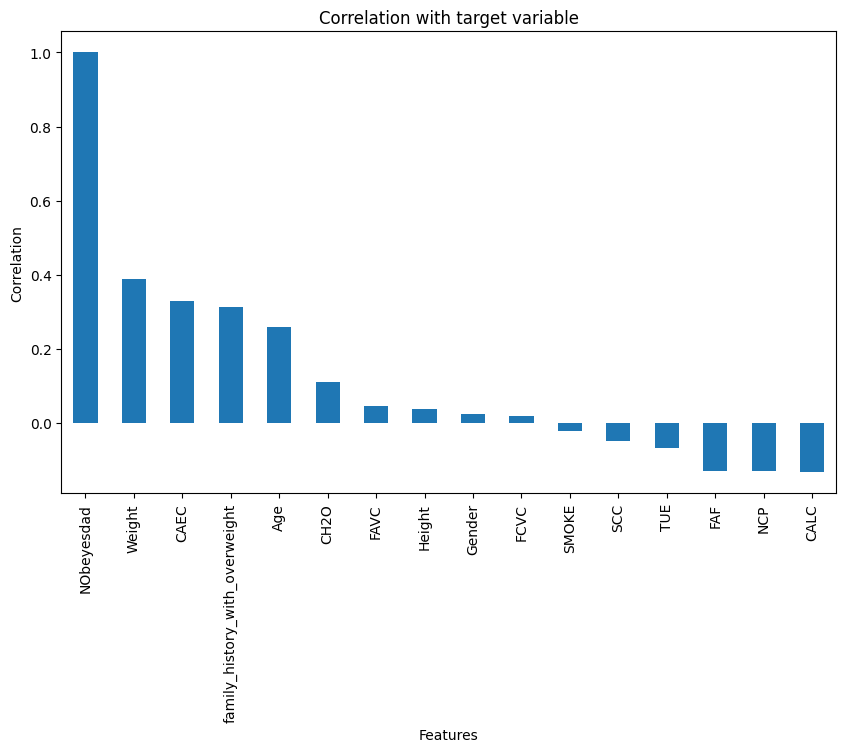

In [137]:
plt.figure(figsize=(10,6))
data.corr()['NObeyesdad'].sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation with target variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

Feature Selection

In [138]:
from sklearn.feature_selection import SelectKBest

x_ft = data.drop(columns=['NObeyesdad'], axis=1)
y_ft = data['NObeyesdad']

selector = SelectKBest(k=10)
selector.fit(x_ft, y_ft)

selected_features = x_ft.columns[selector.get_support()]
print("Selected features :",selected_features)
selected_features.shape

Selected features : Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'CALC'],
      dtype='object')


(10,)

In [140]:
model_data = data[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'CALC','NObeyesdad']]
model_data.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,CALC,NObeyesdad
0,0,-0.552360,-0.881269,-0.862644,1,0,-0.785019,0.410364,2,3,1
1,0,-0.552360,-1.956081,-1.168210,1,0,1.088342,0.410364,2,2,1
2,1,-0.175422,1.053392,-0.366099,1,0,-0.785019,0.410364,2,1,1


Model Training

In [141]:
# Splitting x and y
x = model_data.drop(columns=['NObeyesdad'], axis=1)
y = model_data['NObeyesdad']
x.shape, y.shape

((2111, 10), (2111,))

In [145]:
# Splitting data for training and testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1688, 10), (423, 10), (1688,), (423,))

Logistic Regression

In [147]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [148]:
y_pred_lr = lr.predict(x_test)

In [151]:
print("Accuracy :",accuracy_score(y_test, y_pred_lr))
print("Classification Report :\n",classification_report(y_test, y_pred_lr))

Accuracy : 0.8723404255319149
Classification Report :
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        56
           1       0.91      0.65      0.75        62
           2       0.94      0.87      0.91        78
           3       0.88      0.98      0.93        58
           4       1.00      1.00      1.00        63
           5       0.70      0.82      0.75        56
           6       0.78      0.78      0.78        50

    accuracy                           0.87       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.88      0.87      0.87       423



Random Forest

In [152]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [153]:
y_pred_rf = rf.predict(x_test)

In [154]:
print("Accuracy :",accuracy_score(y_test, y_pred_rf))
print("Classification Report :\n",classification_report(y_test, y_pred_rf))

Accuracy : 0.9432624113475178
Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        56
           1       0.87      0.87      0.87        62
           2       0.96      0.95      0.95        78
           3       0.98      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.88      0.88      0.88        56
           6       0.94      0.98      0.96        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423



SVM

In [155]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [156]:
y_pred_svm = svm.predict(x_test)

In [157]:
print("Accuracy :",accuracy_score(y_test, y_pred_svm))
print("Classification Report :\n",classification_report(y_test, y_pred_svm))

Accuracy : 0.9219858156028369
Classification Report :
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        56
           1       0.92      0.77      0.84        62
           2       0.99      0.95      0.97        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.77      0.84      0.80        56
           6       0.87      0.90      0.88        50

    accuracy                           0.92       423
   macro avg       0.92      0.92      0.92       423
weighted avg       0.92      0.92      0.92       423



**Hyper parameter tuning**

Random Forest has best accuracy. So hyper parameter tuning this model

In [158]:
from sklearn.model_selection import GridSearchCV

# Example with Grid Search for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy: 0.9514283707618564


**Result**

Best Model : Random Forest

Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}

Best accuracy: 0.95